In [32]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [26]:
dateparser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

data = {}
data["raw"] = pd.read_csv("../sample-data/hsi-top-30.csv", parse_dates=['DateTime'], date_parser=dateparser , index_col='DateTime')

In [35]:
stock_names = data["raw"].columns.values.tolist()
stock_names

['5 HK Equity',
 '1299 HK Equity',
 '700 HK Equity',
 '939 HK Equity',
 '941 HK Equity',
 '1398 HK Equity',
 '2318 HK Equity',
 '3988 HK Equity',
 '388 HK Equity',
 '883 HK Equity',
 '1 HK Equity',
 '386 HK Equity',
 '2 HK Equity',
 '823 HK Equity',
 '11 HK Equity',
 '16 HK Equity',
 '3 HK Equity',
 '1113 HK Equity',
 '2388 HK Equity',
 '2628 HK Equity',
 '27 HK Equity',
 '857 HK Equity',
 '688 HK Equity',
 '1093 HK Equity',
 '1928 HK Equity',
 '2007 HK Equity',
 '175 HK Equity',
 '6 HK Equity',
 '1109 HK Equity',
 '762 HK Equity']

In [36]:
data["raw"]

,5 HK Equity,1299 HK Equity,700 HK Equity,939 HK Equity,941 HK Equity,1398 HK Equity,2318 HK Equity,3988 HK Equity,388 HK Equity,883 HK Equity,...,27 HK Equity,857 HK Equity,688 HK Equity,1093 HK Equity,1928 HK Equity,2007 HK Equity,175 HK Equity,6 HK Equity,1109 HK Equity,762 HK Equity
DateTime,,,,,,,,,,,,,,,,,,,,,
2013-09-09,85.65,35.00,78.08,6.01,86.10,5.39,29.425,3.50,125.8,16.20,...,50.95,8.81,22.824,4.04,46.40,4.818,4.10,67.85,21.80,12.18
2013-09-10,85.90,35.05,79.80,6.10,87.85,5.49,29.850,3.56,127.0,16.28,...,52.90,8.83,23.516,4.06,47.70,4.875,4.11,67.30,22.50,12.32
2013-09-11,85.55,35.25,80.44,6.06,87.15,5.49,29.750,3.53,126.9,16.22,...,52.60,8.60,23.565,4.10,48.15,4.846,4.09,66.55,22.50,12.50
2013-09-12,85.70,34.95,82.56,6.09,86.85,5.48,29.875,3.58,126.6,16.06,...,53.30,8.69,23.714,3.84,47.05,4.715,4.10,66.25,22.50,12.68
2013-09-13,85.95,35.15,82.16,6.04,87.60,5.46,29.725,3.53,127.8,16.08,...,52.35,8.67,23.368,3.90,46.25,4.621,4.04,66.05,22.45,12.62
2013-09-16,87.10,36.05,84.24,6.14,88.30,5.54,30.250,3.60,129.2,16.20,...,55.35,8.82,23.615,3.99,47.75,4.771,4.13,66.90,22.80,12.68
2013-09-17,86.20,35.70,83.76,6.13,88.25,5.54,30.025,3.60,129.0,16.04,...,54.15,8.76,23.664,3.99,47.65,4.781,4.17,67.70,23.20,12.66
2013-09-18,86.20,36.40,80.48,6.11,87.35,5.49,29.850,3.60,129.5,15.98,...,53.65,8.74,23.516,3.91,47.55,4.687,4.10,67.65,23.15,12.70
2013-09-19,87.95,37.10,82.04,6.21,87.95,5.59,30.450,3.65,130.4,16.08,...,55.15,8.93,23.763,3.84,48.70,4.734,4.09,68.00,23.45,12.84


In [28]:
data["raw"].index

DatetimeIndex(['2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-16', '2013-09-17', '2013-09-18',
               '2013-09-19', '2013-09-20',
               ...
               '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30',
               '2018-08-31', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07'],
              dtype='datetime64[ns]', name='DateTime', length=1305, freq=None)

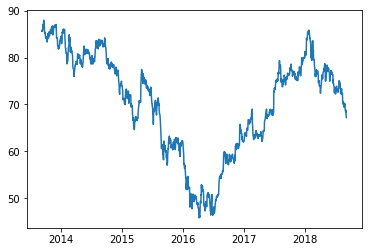

In [33]:
plt.plot(data["raw"]["5 HK Equity"])
plt.show()

### Correlation

In [48]:
invalid_stocks = []

for stock in stock_names:
    index_with_negatives = data["raw"].index[data["raw"][stock] < 0]
    
    if len(index_with_negatives) > 0:
        invalid_stocks.append(stock)

invalid_stocks

['1113 HK Equity']

In [52]:
valid_stocks = [x for x in stock_names if x not in invalid_stocks]

data["valid_stocks"] = data["raw"][valid_stocks]

In [56]:
data["valid_stocks"].corr()

,5 HK Equity,1299 HK Equity,700 HK Equity,939 HK Equity,941 HK Equity,1398 HK Equity,2318 HK Equity,3988 HK Equity,388 HK Equity,883 HK Equity,...,27 HK Equity,857 HK Equity,688 HK Equity,1093 HK Equity,1928 HK Equity,2007 HK Equity,175 HK Equity,6 HK Equity,1109 HK Equity,762 HK Equity
5 HK Equity,1.000000,0.085731,0.111995,0.476736,-0.295154,0.584886,0.215770,0.378402,-0.060034,0.763678,...,0.850478,0.587613,-0.093683,0.190240,0.794543,0.345355,0.244233,-0.468877,0.193319,0.684351
1299 HK Equity,0.085731,1.000000,0.949435,0.785145,-0.277598,0.685934,0.941602,0.417736,0.815655,-0.080490,...,0.229642,-0.490017,0.655900,0.925900,-0.214118,0.887282,0.895854,-0.352196,0.838430,-0.065356
700 HK Equity,0.111995,0.949435,1.000000,0.729436,-0.450603,0.624715,0.938026,0.271723,0.725179,-0.097263,...,0.320532,-0.569980,0.564754,0.931266,-0.120001,0.942761,0.967336,-0.396958,0.767086,-0.151583
939 HK Equity,0.476736,0.785145,0.729436,1.000000,-0.126018,0.966736,0.856021,0.789547,0.766168,0.299005,...,0.462745,-0.006467,0.645207,0.735710,0.100328,0.775686,0.715403,-0.341179,0.853534,0.367646
941 HK Equity,-0.295154,-0.277598,-0.450603,-0.126018,1.000000,-0.060530,-0.323012,0.379673,0.116346,-0.214006,...,-0.633759,0.290103,0.217720,-0.538497,-0.481328,-0.571477,-0.500986,0.755597,-0.151678,0.307756
1398 HK Equity,0.584886,0.685934,0.624715,0.966736,-0.060530,1.000000,0.793176,0.828898,0.694985,0.392672,...,0.505509,0.138335,0.614642,0.625649,0.177857,0.702035,0.644240,-0.298378,0.791337,0.515856
2318 HK Equity,0.215770,0.941602,0.938026,0.856021,-0.323012,0.793176,1.000000,0.495922,0.821471,0.002226,...,0.336357,-0.411242,0.676118,0.901693,-0.114399,0.908679,0.904338,-0.388547,0.863417,0.020357
3988 HK Equity,0.378402,0.417736,0.271723,0.789547,0.379673,0.828898,0.495922,1.000000,0.655275,0.185077,...,0.151895,0.305827,0.563595,0.264723,-0.051240,0.284633,0.260785,0.089667,0.577322,0.610835
388 HK Equity,-0.060034,0.815655,0.725179,0.766168,0.116346,0.694985,0.821471,0.655275,1.000000,-0.173698,...,-0.063136,-0.321270,0.815268,0.661950,-0.436497,0.594136,0.625524,-0.003996,0.774751,0.060318
883 HK Equity,0.763678,-0.080490,-0.097263,0.299005,-0.214006,0.392672,0.002226,0.185077,-0.173698,1.000000,...,0.713318,0.718371,-0.139619,0.062421,0.780110,0.141263,-0.029372,-0.461294,0.086340,0.580653


In [57]:
data["valid_stocks"].corr().values

array([[  1.00000000e+00,   8.57306855e-02,   1.11994925e-01,
          4.76736108e-01,  -2.95153815e-01,   5.84885739e-01,
          2.15770312e-01,   3.78401979e-01,  -6.00340784e-02,
          7.63677768e-01,  -4.64130348e-01,   6.78558321e-01,
         -2.09743319e-01,  -2.66070651e-03,   1.42189341e-01,
          4.17167836e-01,   2.52623172e-01,   3.20252883e-01,
          2.43643588e-01,   8.50477776e-01,   5.87612679e-01,
         -9.36833562e-02,   1.90239787e-01,   7.94543351e-01,
          3.45354582e-01,   2.44233238e-01,  -4.68876960e-01,
          1.93318859e-01,   6.84350769e-01],
       [  8.57306855e-02,   1.00000000e+00,   9.49435104e-01,
          7.85144547e-01,  -2.77598413e-01,   6.85934107e-01,
          9.41602113e-01,   4.17736113e-01,   8.15654684e-01,
         -8.04896418e-02,   4.74217950e-01,   2.51075148e-01,
          8.29036794e-01,   9.47341494e-01,   9.54829293e-01,
          7.22623249e-01,   9.26563000e-01,   9.21570854e-01,
          8.71833894e-02,

### Log price

In [101]:
data["valid_stocks_log"] = np.log(data["valid_stocks"])

In [100]:
c = data["valid_stocks_log"].corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so[-40-29:-29]

2318 HK Equity  2388 HK Equity    0.902995
2388 HK Equity  2318 HK Equity    0.902995
                175 HK Equity     0.904005
175 HK Equity   2388 HK Equity    0.904005
2388 HK Equity  1299 HK Equity    0.906563
1299 HK Equity  2388 HK Equity    0.906563
175 HK Equity   11 HK Equity      0.911558
11 HK Equity    175 HK Equity     0.911558
1299 HK Equity  3 HK Equity       0.915799
3 HK Equity     1299 HK Equity    0.915799
11 HK Equity    2388 HK Equity    0.923654
2388 HK Equity  11 HK Equity      0.923654
823 HK Equity   2 HK Equity       0.925286
2 HK Equity     823 HK Equity     0.925286
1299 HK Equity  1093 HK Equity    0.926968
1093 HK Equity  1299 HK Equity    0.926968
11 HK Equity    700 HK Equity     0.928068
700 HK Equity   11 HK Equity      0.928068
11 HK Equity    1093 HK Equity    0.931733
1093 HK Equity  11 HK Equity      0.931733
2318 HK Equity  11 HK Equity      0.938871
11 HK Equity    2318 HK Equity    0.938871
175 HK Equity   700 HK Equity     0.943436
700 HK Equi

### Cointegration

In [103]:
print(ts.coint(data["valid_stocks_log"]["175 HK Equity"], data["valid_stocks"]["700 HK Equity"])) 
print(ts.coint(data["valid_stocks_log"]["939 HK Equity"], data["valid_stocks"]["1398 HK Equity"]))

(-2.7837368647468219, 0.17091415033303586, array([-3.90485841, -3.34081967, -3.04770405]))
(-2.3341703567043153, 0.35663173448722763, array([-3.90485841, -3.34081967, -3.04770405]))


In [110]:
data["valid_stocks_log"][-120:]

,5 HK Equity,1299 HK Equity,700 HK Equity,939 HK Equity,941 HK Equity,1398 HK Equity,2318 HK Equity,3988 HK Equity,388 HK Equity,883 HK Equity,...,27 HK Equity,857 HK Equity,688 HK Equity,1093 HK Equity,1928 HK Equity,2007 HK Equity,175 HK Equity,6 HK Equity,1109 HK Equity,762 HK Equity
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-03-26,4.317488,4.214347,6.055847,2.102914,4.256322,1.905088,4.430817,1.442202,5.561451,2.463002,...,4.272491,1.695616,3.299534,3.081910,3.741235,2.728898,3.188417,4.252772,3.369018,2.232163
2018-03-27,4.318821,4.209160,6.068888,2.111425,4.287029,1.918392,4.425445,1.458615,5.573674,2.463002,...,4.281515,1.704748,3.342862,3.088767,3.753027,2.764241,3.178054,4.253483,3.375880,2.286456
2018-03-28,4.304065,4.178992,6.021509,2.084429,4.266896,1.902108,4.383900,1.439835,5.542048,2.452728,...,4.247066,1.702928,3.306887,3.034953,3.718438,2.730138,3.117950,4.247066,3.339322,2.273156
2018-03-29,4.304065,4.195697,6.015181,2.086914,4.275971,1.906575,4.379524,1.439835,5.542048,2.447551,...,4.266195,1.684545,3.305054,3.037354,3.742420,2.732613,3.117950,4.247781,3.351657,2.292535
2018-03-30,4.304065,4.195697,6.015181,2.086914,4.275971,1.906575,4.379524,1.439835,5.542048,2.447551,...,4.266195,1.684545,3.305054,3.037354,3.742420,2.732613,3.117950,4.247781,3.351657,2.292535
2018-04-02,4.304065,4.195697,6.015181,2.086914,4.275971,1.906575,4.379524,1.439835,5.542048,2.447551,...,4.266195,1.684545,3.305054,3.037354,3.742420,2.732613,3.117950,4.247781,3.351657,2.292535
2018-04-03,4.297965,4.215086,6.014693,2.094330,4.284276,1.919859,4.388257,1.449269,5.532599,2.410542,...,4.285653,1.680828,3.308717,3.061052,3.749504,2.716349,3.135494,4.127134,3.349904,2.297573
2018-04-04,4.282206,4.198705,5.985446,2.055405,4.254903,1.884035,4.368815,1.420696,5.517453,2.392426,...,4.252772,1.669592,3.297687,3.093313,3.735286,2.692192,3.097837,4.110874,3.332205,2.274186
2018-04-05,4.282206,4.198705,5.985446,2.055405,4.254903,1.884035,4.368815,1.420696,5.517453,2.392426,...,4.252772,1.669592,3.297687,3.093313,3.735286,2.692192,3.097837,4.110874,3.332205,2.274186
